In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "Llama3.1-8B-Chinese-Chat"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   text                                                                   3000 non-null   object
 1   label                                                                  3000 non-null   object
 2   title                                                                  3000 non-null   object
 3   puzzle                                                                 3000 non-null   object
 4   truth                                                                  3000 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf                 3000 non-null   object
 6   shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf   3000 non-null   object
 7

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf',
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf']

In [9]:
perf_df = get_metrics_df(df)
perf_df

/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:343: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                                              model  accuracy  \
0    0.0  shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.fl...  0.236667   
1    0.2  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.625667   
2    0.4  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.762000   
3    0.6  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.680333   
4    0.8  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.752333   
5    1.0  shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoi...  0.737000   

   precision    recall        f1  
0   0.745718  0.236667  0.339624  
1   0.827414  0.625667  0.693570  
2   0.789946  0.762000  0.766701  
3   0.798030  0.680333  0.721244  
4   0.807426  0.752333  0.773644  
5   0.809059  0.737000  0.763784

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


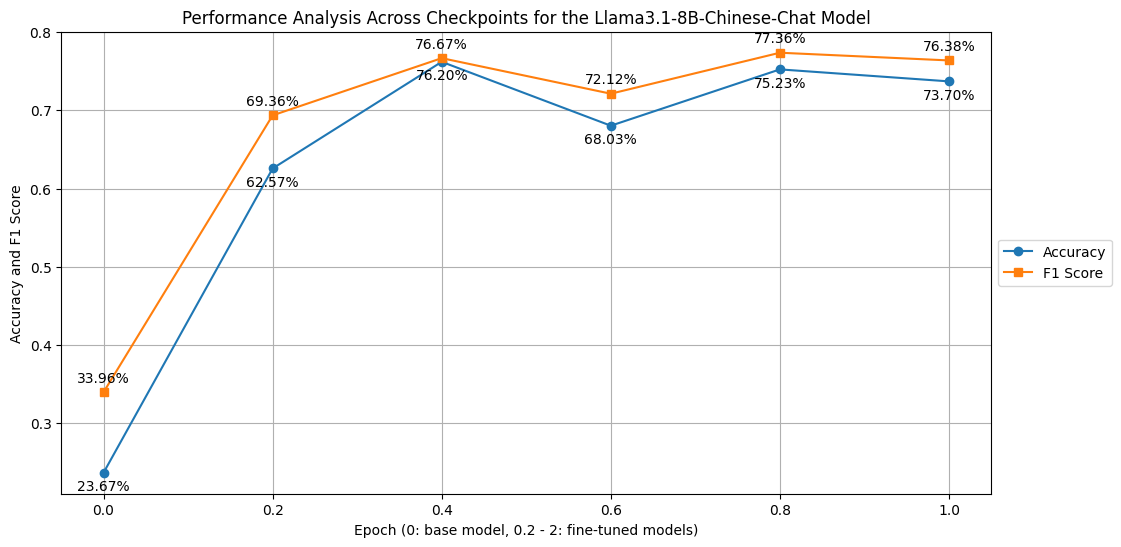

In [13]:
plot_metrics(perf_df, model_name)

In [11]:
perf_df.to_csv(metrics_csv, index=False)

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat_torch.float16_lf
不是。         1355
是            505
是。           434
不是           289
回答正确         229
不重要           90
问法错误          64
不是重要          10
不重要。           9
回答正确。          5
问法错误。          4
不是重要。          3
是物品。           1
是小男孩的哭声。       1
問法错误           1
Name: count, dtype: int64


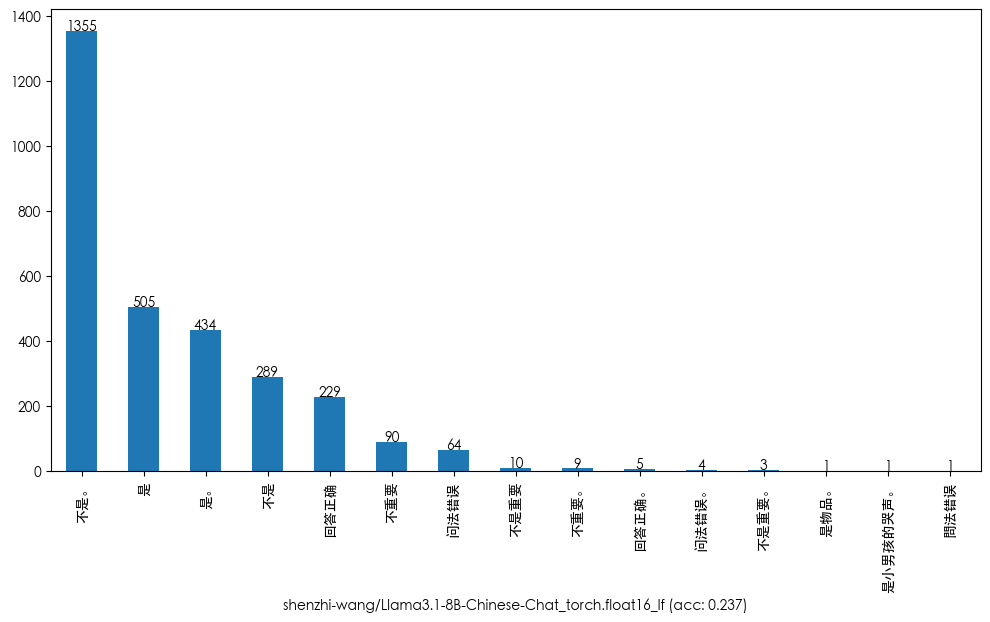

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-35_torch.float16_lf
不是      1024
不重要      949
是        941
问法错误      45
回答正确      41
Name: count, dtype: int64


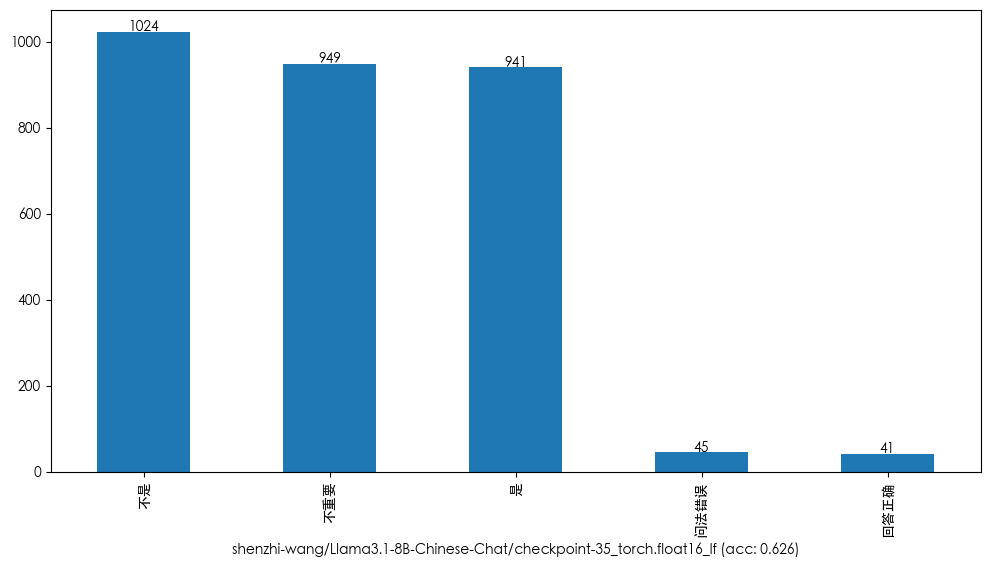

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-70_torch.float16_lf
不是      1686
是       1015
不重要      269
回答正确      23
问法错误       7
Name: count, dtype: int64


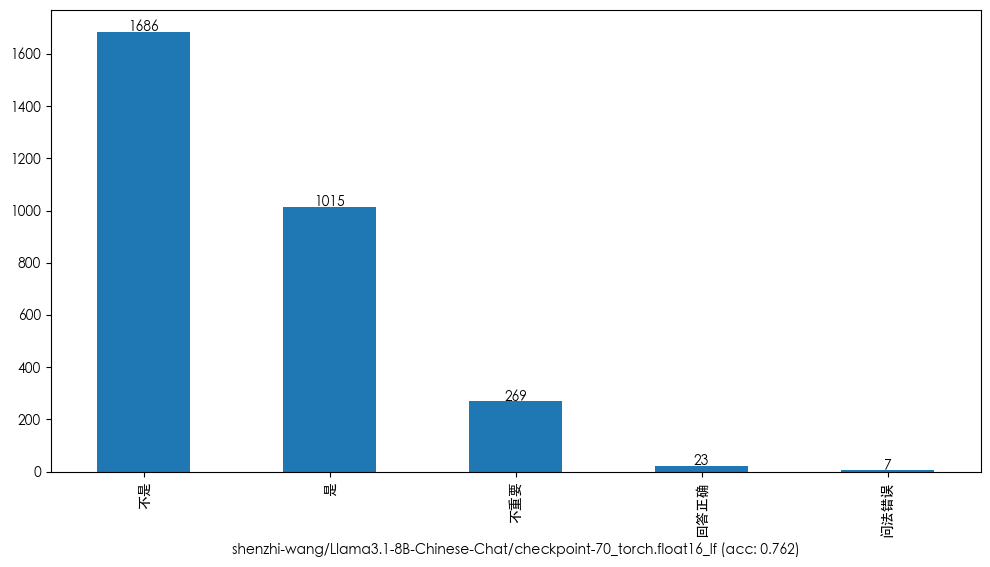

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-105_torch.float16_lf
不是      1289
是        998
不重要      675
回答正确      29
问法错误       9
Name: count, dtype: int64


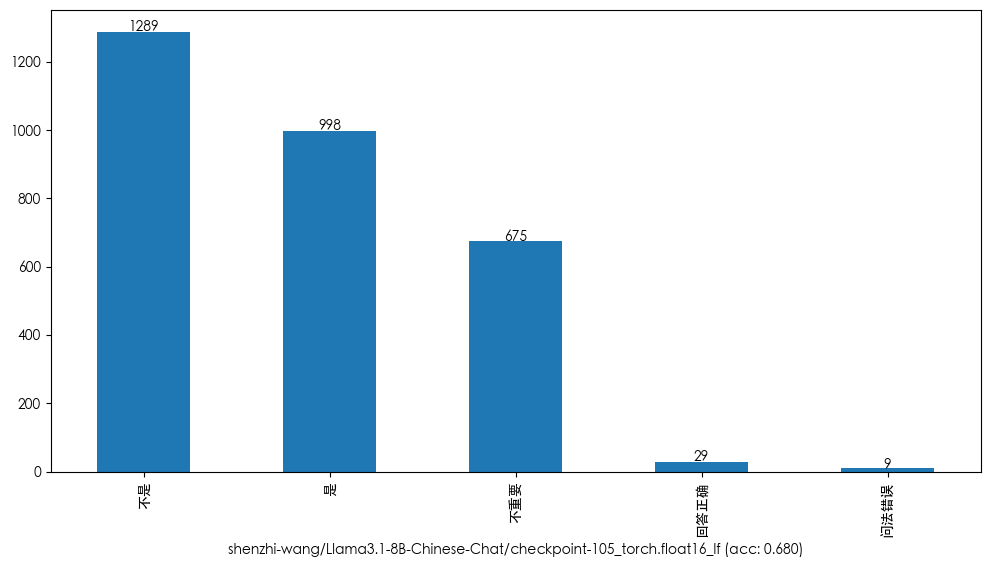

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-140_torch.float16_lf
不是      1421
是       1101
不重要      385
问法错误      62
回答正确      31
Name: count, dtype: int64


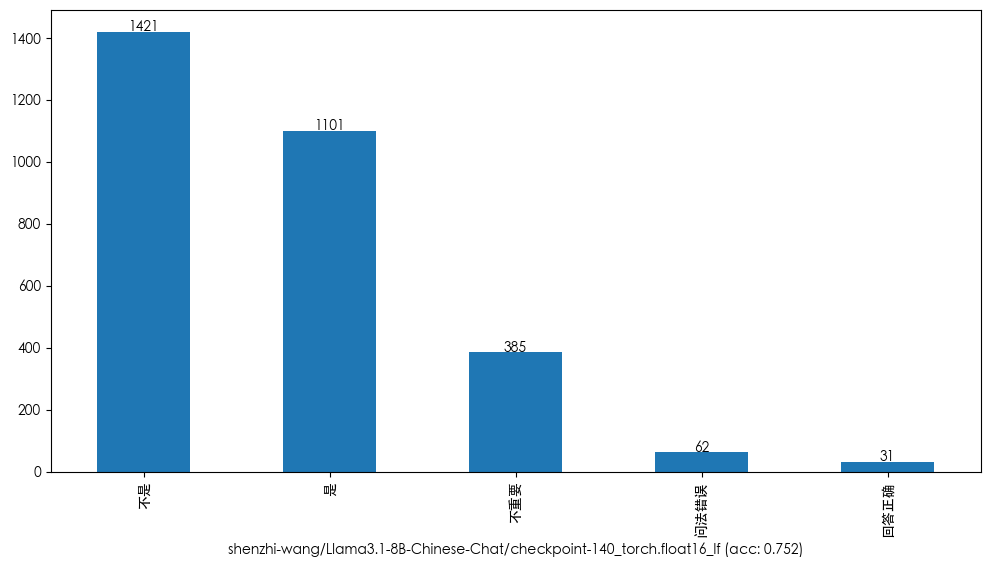

********** shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf **********
shenzhi-wang/Llama3.1-8B-Chinese-Chat/checkpoint-175_torch.float16_lf
不是      1409
是       1047
不重要      469
问法错误      44
回答正确      31
Name: count, dtype: int64


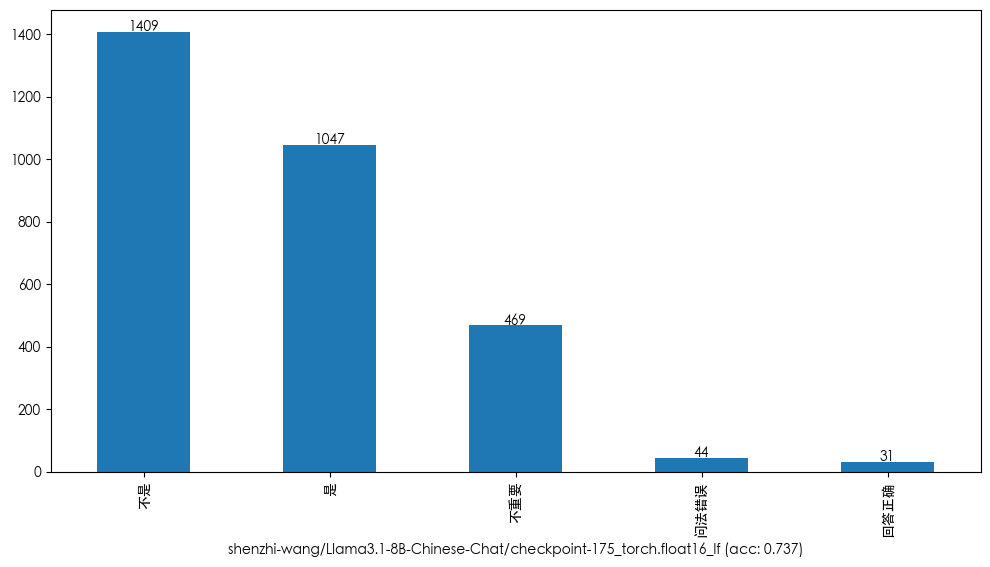

In [12]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, f"{col} (acc: {accuracy:.3f})")